# Sao Paolo EDA

Looking at the Sao Paolo Hospital Dataset. 

### Import Libraries

In [975]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
import seaborn as sns


In [1007]:
def plot_history(history):
    acc = history.history['acc']
#     val_acc = history.history['val_acc']
    loss = history.history['loss']
#     val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
#     plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
#     plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training loss')
    plt.legend()

### Set Seed

In [976]:
from keras import backend as K

# Seed value
seed_value= 101

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)


## Import and Read Data

In [977]:
data1 = pd.read_csv("Einstein_Data4u_Sao_Paulo.tsv", delimiter='\t', header=2)

In [978]:
data1.head()

,IndividualID,Type,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_in_regular_ward,Patient_in_semi_intensive_unit,Patient_in_intensive_care,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration,Leukocytes,Basophils,Mean_corpuscular_hemoglobin,Eosinophils,Mean_corpuscular_volume,Monocytes,Red_blood_cell_distribution_width,Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus_Enterovirus,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Parainfluenza_2,Influenza_B_rapid_test,Influenza_A_rapid_test
0,44477f75e8169d2,ED4U_subject,13,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,ED4U_subject,17,False,False,False,False,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,a46b4402a0e5696,ED4U_subject,8,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,ED4U_subject,5,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,ED4U_subject,15,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN


In [1050]:
data1.info()

False    5086
True      558
Name: SARS_Cov_2_exam_result, dtype: int64

In [980]:
data2 = pd.read_excel('dataset_Euegene.xlsx', delimeter='t') 

# Extract relevant (<200 n/A values) columns and join tables and drop columns testing for other illness'
data = data1.iloc[:,range(0,21)].join(data2.iloc[:,[39,42,43]]) 
data.head()                                                     

,IndividualID,Type,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_in_regular_ward,Patient_in_semi_intensive_unit,Patient_in_intensive_care,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration,Leukocytes,Basophils,Mean_corpuscular_hemoglobin,Eosinophils,Mean_corpuscular_volume,Monocytes,Red_blood_cell_distribution_width,Neutrophils,Creatinine,Potassium
0,44477f75e8169d2,ED4U_subject,13,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,ED4U_subject,17,False,False,False,False,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.619086,2.089928,-0.305787
2,a46b4402a0e5696,ED4U_subject,8,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,ED4U_subject,5,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,ED4U_subject,15,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [981]:
# Other virus tests True/False
# for i in data.iloc[:, range(21,40)]:
#     print(data[i].value_counts())  

## Clean Data

In [982]:
df = data.loc[data['Hematocrit'].notna()]                    # Find rows with full test data
df = df.fillna(df.median())                                  # Fill n/a values with median of each column
df['Severity'] = df.iloc[:, range(4,7)].idxmax(axis=1)       # Create categorical dependant variable

df.loc[
    (df['Patient_in_regular_ward'] == False) & 
    (df['Patient_in_semi_intensive_unit'] == False) &
    (df['Patient_in_intensive_care'] == False), 'Severity'] = 'Not_in_ward' 

df = df.drop(columns=['Patient_in_regular_ward','Patient_in_semi_intensive_unit', 'Patient_in_intensive_care']) # Drop dummies

df['SARS_Cov_2_exam_result'] = (df['SARS_Cov_2_exam_result']*1) # Convert boolean to int (for plotting)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 5643
Data columns (total 22 columns):
IndividualID                                 603 non-null object
Type                                         603 non-null object
Patient_age_quantile                         603 non-null int64
SARS_Cov_2_exam_result                       603 non-null int64
Hematocrit                                   603 non-null float64
Hemoglobin                                   603 non-null float64
Platelets                                    603 non-null float64
Mean_platelet_volume                         603 non-null float64
Red_blood_Cells                              603 non-null float64
Lymphocytes                                  603 non-null float64
Mean_corpuscular_hemoglobin_concentration    603 non-null float64
Leukocytes                                   603 non-null float64
Basophils                                    603 non-null float64
Mean_corpuscular_hemoglobin               

In [983]:
df['Severity'].value_counts()

Not_in_ward                       474
Patient_in_regular_ward            58
Patient_in_semi_intensive_unit     42
Patient_in_intensive_care          29
Name: Severity, dtype: int64

## K-Means Clustering

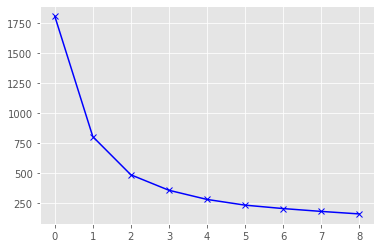

In [984]:
X = df.loc[:, ['Hematocrit','Hemoglobin','Red_blood_Cells']] # Clustering for gender

from sklearn.cluster import KMeans
import seaborn as sns

n_clusters=10  # Number of clusters to test - separate samples by n groups of equal variance
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_) 
plt.plot(cost, 'bx-');

# Clustering using Kmeans.  



/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


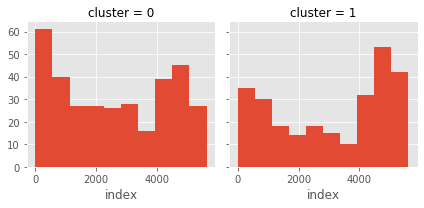

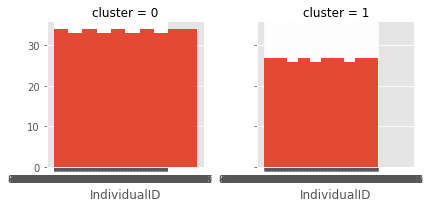

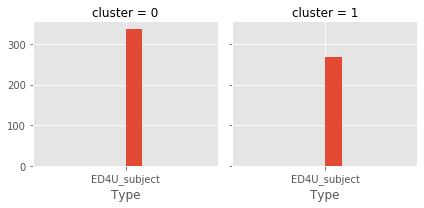

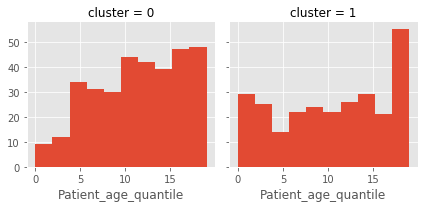

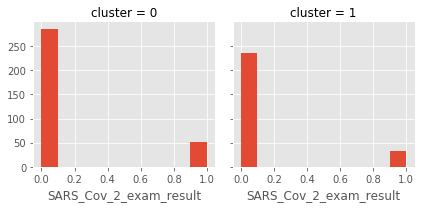

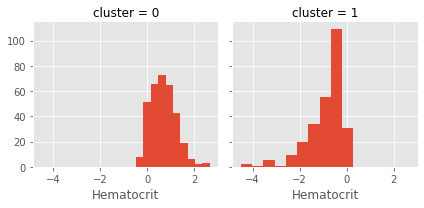

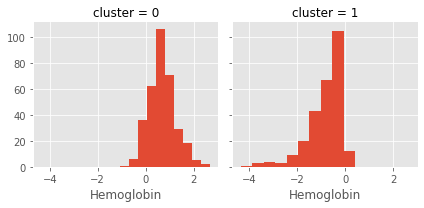

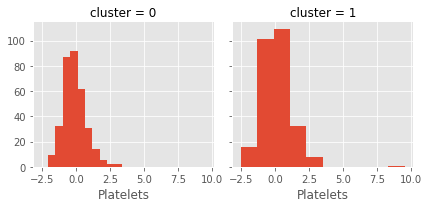

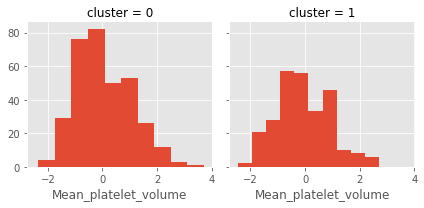

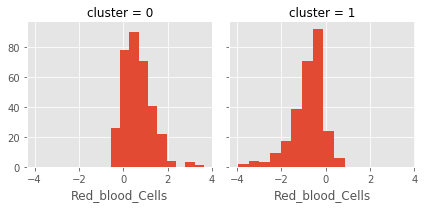

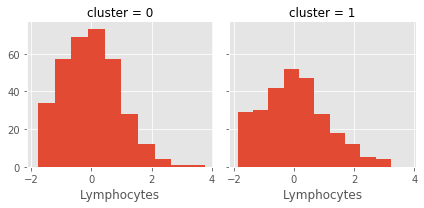

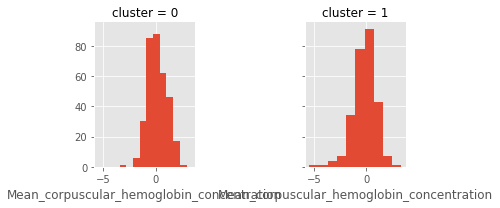

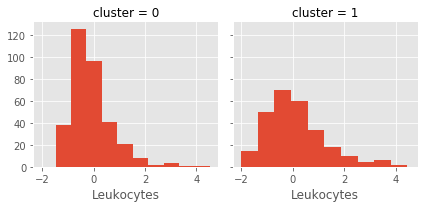

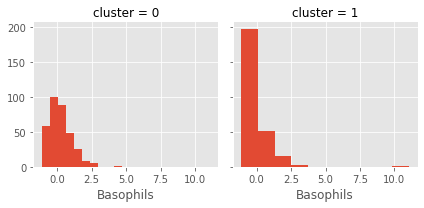

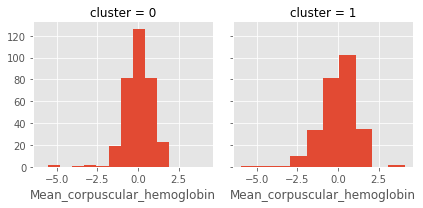

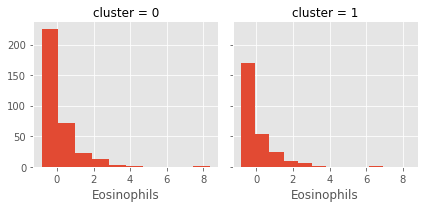

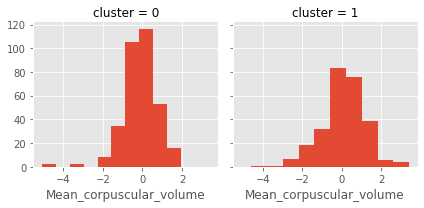

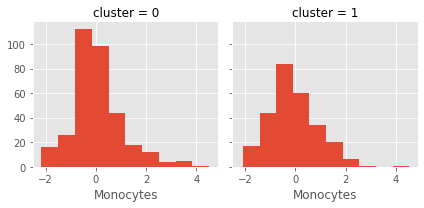

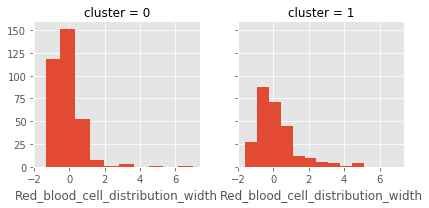

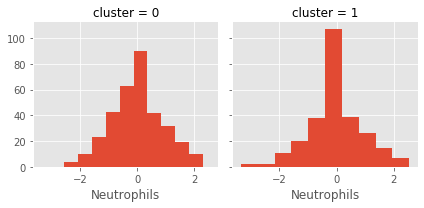

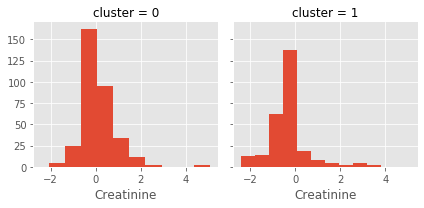

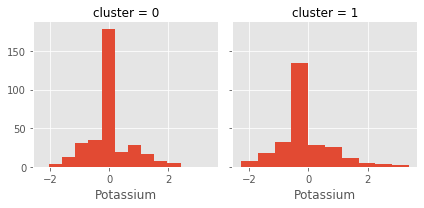

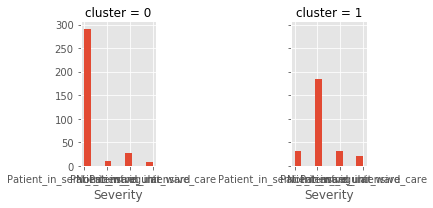

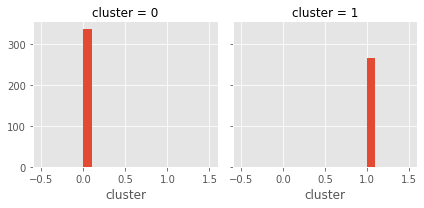

In [985]:
kmean= KMeans(2)
kmean.fit(X)
labels=kmean.labels_

# Add in the newly generated 'clusters' feature
df_full = pd.concat([df.reset_index(), pd.DataFrame({'cluster':labels})], axis=1)
df_full.head()

# Plot cluster against all other features
for c in df_full:
    grid = sns.FacetGrid(df_full, col='cluster')
    grid.map(plt.hist, c)

In [986]:
df_full.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 24 columns):
index                                        603 non-null int64
IndividualID                                 603 non-null object
Type                                         603 non-null object
Patient_age_quantile                         603 non-null int64
SARS_Cov_2_exam_result                       603 non-null int64
Hematocrit                                   603 non-null float64
Hemoglobin                                   603 non-null float64
Platelets                                    603 non-null float64
Mean_platelet_volume                         603 non-null float64
Red_blood_Cells                              603 non-null float64
Lymphocytes                                  603 non-null float64
Mean_corpuscular_hemoglobin_concentration    603 non-null float64
Leukocytes                                   603 non-null float64
Basophils                                    

In [987]:
df_final = df_full.drop(columns=['index','IndividualID','Type'])
df_final.head()

,Patient_age_quantile,SARS_Cov_2_exam_result,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration,Leukocytes,Basophils,Mean_corpuscular_hemoglobin,Eosinophils,Mean_corpuscular_volume,Monocytes,Red_blood_cell_distribution_width,Neutrophils,Creatinine,Potassium,Severity,cluster
0,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.619086,2.089928,-0.305787,Not_in_ward,0
1,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-1.838623,0.930020,Patient_in_semi_intensive_unit,1
2,9,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0.880570,-0.908177,0.435697,Not_in_ward,1
3,11,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.265957,-0.081113,-0.058626,Not_in_ward,0
4,9,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.422410,-0.908177,-0.552949,Not_in_ward,0


## Note on Ordinal Data
I will consider this ordinal data as disease progresses into a worse state a greater level of care is needed and so there is a clear relationship between  the different levels of severity. It is important we treat the data as such for our neural network - doing so instantly increases the weighted accuracy by 15% and helps to reduce overfitting.
<br>Reference: http://orca.st.usm.edu/~zwang/files/rank.pdf - _A Neural Network Approach to Ordinal Regression_, J. Cheng, Z. Wang, and G. Pollastri (2007)  


## Encoding & Train/Test Split


In [988]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler

# 4 classes
# X = df_final.drop(columns=['Severity'])
# y = label_binarize(df_final['Severity'], classes=['Not_in_ward', 'Patient_in_regular_ward', 'Patient_in_semi_intensive_unit', 'Patient_in_intensive_care'])

# 3 classes
df_final.loc[(df_final['Severity']=='Patient_in_semi_intensive_unit') | (df_final['Severity']=='Patient_in_intensive_care'), 'Severity'] = 'Patient_in_intensive_ward'
X = df_final.drop(columns=['Severity'])
#y = label_binarize(df_final['Severity'], classes=['Not_in_ward', 'Patient_in_regular_ward', 'Patient_in_intensive_ward'])
y = df_final['Severity']

# Train = 90% ; Test = 10% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 101)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)

In [989]:
sc = StandardScaler()
sc.fit(X_test)
X_test = sc.transform(X_test)

## Class Weightings


In [990]:
y_train.value_counts()

Not_in_ward                  427
Patient_in_intensive_ward     62
Patient_in_regular_ward       53
Name: Severity, dtype: int64

In [991]:
# 3 Class
l = y_train.value_counts() 

Not_in_ward                     = l[0]
Patient_in_intensive_ward       = l[1]
Patient_in_regular_ward         = l[2]

w_1 = Not_in_ward/Patient_in_regular_ward
w_2 = Not_in_ward/Patient_in_intensive_ward
w_1,w_2

(8.056603773584905, 6.887096774193548)

In [992]:
# 4 Class
# Not_in_ward                     = l[0]
# Patient_in_regular_ward         = l[1]
# Patient_in_semi_intensive_unit  = l[2]
# Patient_in_intensive_care       = l[3]

# w_1 = Not_in_ward/Patient_in_regular_ward
# w_2 = Not_in_ward/Patient_in_semi_intensive_unit
# w_3 = Not_in_ward/Patient_in_intensive_care
# w_1, w_2, w_3

In [993]:
y_train = np.array([[0,0] if i == 'Not_in_ward' else [1,0] if i =='Patient_in_regular_ward' else [1,1] for i in y_train])
y_test  = np.array([[0,0] if i == 'Not_in_ward' else [1,0] if i =='Patient_in_regular_ward' else [1,1] for i in y_test])

y_test.shape, y_train.shape, X_test.shape, X_train.shape

((61, 2), (542, 2), (61, 20), (542, 20))

## Modeling

In [1043]:
import keras
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
from keras import layers
from keras import regularizers


l1 = regularizers.l1(1*10**(-4)) 
l2 = regularizers.l2(1*10**(-1))

model = Sequential()

model.add(layers.Dense(40, input_dim = X_train.shape[1], activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(40, activation='relu', activity_regularizer=l1, kernel_regularizer=l2))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(40, activation='relu'))

model.add(layers.Dense(2, activation ='sigmoid')) # Sigmoid as ordinal data not categorical

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_452 (Dense)            (None, 40)                840       
_________________________________________________________________
dropout_174 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_453 (Dense)            (None, 40)                1640      
_________________________________________________________________
dropout_175 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_454 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_455 (Dense)            (None, 2)                 82        
Total params: 4,202
Trainable params: 4,202
Non-trainable params: 0
_________________________________________________________________


In [1044]:
opt = Adam(lr=0.005)  # Combines momentum and RMS gradient descent to speed up training and get out of saddle points (where gradient is very close to 0)

# batch_size = int(X_train.shape[0]/8)

model.compile(optimizer=opt,
              loss='binary_crossentropy', # One output value (either y=0 or y=1 for target, not array)
              metrics=['accuracy'])

hist = model.fit(x = X_train, y = y_train,
#                  batch_size = batch_size,
                 class_weight = {0:1.0, 1:1.0, 2:10**10},
                 epochs=10, verbose=0)


Training Accuracy: 0.9022 
Training Loss: 0.2879
Testing Accuracy:  0.8361 
Testing Loss:  0.4061


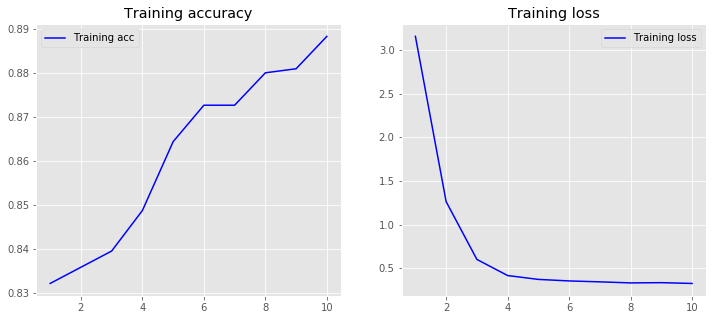

In [1045]:
# Rough metrics - don't account for class imbalance

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f} \nTraining Loss: {:.4f}".format(accuracy, loss))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f} \nTesting Loss:  {:.4f}".format(accuracy, loss))

plot_history(hist)

In [1046]:
correct=0
incorrect=0

for i,j in enumerate(model.predict(X_test)):
    a = np.array([round(x) for x in j])
    print(a, y_test[i])
    if sum(a) == sum(y_test[i]):
        correct+=1
    else:
        incorrect+=1
        
correct, incorrect, (correct/(incorrect+correct))

[0. 0.] [0 0]
[0. 0.] [1 1]
[1. 0.] [1 1]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[1. 1.] [1 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [1 1]
[0. 0.] [0 0]
[1. 0.] [1 0]
[0. 0.] [0 0]
[1. 0.] [1 1]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [1 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [1 1]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[1. 0.] [1 0]
[0. 0.] [0 0]
[1. 0.] [0 0]
[0. 0.] [1 1]
[0. 0.] [0 0]
[0. 0.] [0 0]
[1. 0.] [1 1]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [1 1]
[0. 0.] [0 0]
[1. 1.] [0 0]
[0. 0.] [1 0]
[0. 0.] [0 0]
[1. 1.] [1 1]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[1. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]
[0. 0.] [0 0]


(47, 14, 0.7704918032786885)

In [720]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# Predicted labels - argmax will select the largest value (the highest probability) and the corresponding label.
preds = model.predict(X_test)
preds = np.argmax(preds, axis = -1)

# Original labels 
orig_test_labels = np.argmax(y_test, axis = -1)

# Generate a confusion matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

# multilabel_confusion_matrix(orig_test_labels, preds)
#                 True
#                +    -
# Predicted   +  tp   fp
#             -  fn   tn

array([[60]])

In [787]:
for i in range(0,4):
    print(cm[i].sum())

60


IndexError: index 1 is out of bounds for axis 0 with size 1

In [21]:
# recall_no_ward = cm[0][0] / (cm[0][0] + cm[1][0]+ cm[2][0] + cm[3][0])
# precision_no_ward = cm[0][0] / (cm[0][0] + cm[0][1]+ cm[0][2] + cm[0][3])
# f1_no_ward = 2 * (recall_no_ward * precision_no_ward) / (recall_no_ward + precision_no_ward)

# recall_ward = cm[1][1] / (cm[0][1] + cm[1][1]+ cm[2][1] + cm[3][1])
# precision_ward = cm[1][1] / (cm[1][0] + cm[1][1]+ cm[1][2] + cm[1][3])
# f1_ward = 2 * (recall_ward * precision_ward) / (recall_ward + precision_ward)

# recall_semi_intensive = cm[2][2] / (cm[0][2] + cm[1][2]+ cm[2][2] + cm[3][2])
# precision_semi_intensive = cm[2][2] / (cm[2][0] + cm[2][1]+ cm[2][2] + cm[2][3])
# f1_semi_intensive = 2 * (recall_semi_intensive * precision_semi_intensive) / (recall_semi_intensive + precision_semi_intensive)

# recall_intensive = cm[3][3] / (cm[0][3] + cm[1][3]+ cm[2][3] + cm[3][3])
# precision_intensive = cm[3][3] / (cm[3][0] + cm[3][1]+ cm[3][2] + cm[3][3])
# f1_intensive = 2 * (recall_intensive * precision_intensive) / (recall_intensive + precision_intensive)


# macro_f1 = (f1_no_ward + f1_ward + f1_intensive + f1_semi_intensive) / 4

# print(f1_no_ward ,f1_ward ,f1_intensive, f1_semi_intensive)

,IndividualID,Type,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_in_regular_ward,Patient_in_semi_intensive_unit,Patient_in_intensive_care,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration,Leukocytes,Basophils,Mean_corpuscular_hemoglobin,Eosinophils,Mean_corpuscular_volume,Monocytes,Neutrophils,Creatinine,Potassium
0,44477f75e8169d2,ED4U_subject,13,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,ED4U_subject,17,False,False,False,False,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.619086,2.089928,-0.305787
2,a46b4402a0e5696,ED4U_subject,8,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,ED4U_subject,5,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,ED4U_subject,15,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,ED4U_subject,9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,ED4U_subject,13,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,ED4U_subject,16,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,ED4U_subject,1,False,False,True,False,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.127395,-1.838623,0.930020
9,5f1ed301375586c,ED4U_subject,17,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
